# Evaluation and results of Chapter 5

In this file we present source code used for some evaluations presented in master thesis: Classification in data streams with abrupt concept drift in a subset of features

please import following libraries:

In [2]:
import numpy as np
import scipy.stats as stats
import random 
import matplotlib.pyplot as plt

#our implementation of used classes and functions
import classes as cl
import postprocessing_functions as pf

## Section 5.2

Figure 5.2\
Replication of original results of Dynamic Weighted Algorithm (DWM)

In [ ]:
#accuracy and number of models for dataset with noise 10%
random.seed(42)  
np.random.seed(42)
mean_of = 10
num_of_models = []
accuracies = []
for _ in range(mean_of):
    samples, label = pf.create_kolter_dataset(50000,[8,9,7,9.5],10)
    samples_for_testing_accuracy, labels_for_testing_accuracy = pf.create_kolter_dataset(10000,[8,9,7,9.5]) #create 2500 testing examples for each concept
    train_data = np.array(samples)
    train_targets = np.array(label)
    process_with_noise = cl.DWM(train_data[:1],train_targets[:1],50, 0.5, 2, 0.01, 0, 1)
    num_of_models_with_noise = [1]
    accuracy = []
    for data_index  in range(1,len(train_data)):
        process_with_noise.process_sample(train_data[data_index : data_index + 1],train_targets[data_index : data_index + 1])
        num_of_models_with_noise.append(process_with_noise.get_number_of_models())
        if (data_index + 1 ) % 500 == 0 and (data_index + 1 ) != 50000:
            accuracy.append(process_with_noise.get_accuracy_on_samples(samples_for_testing_accuracy[2500 * ((data_index + 1 ) // 12500 ): 2500 * (((data_index + 1 ) // 12500 ) + 1)],labels_for_testing_accuracy[2500 * ((data_index + 1 ) // 12500 ): 2500 * (((data_index + 1 ) // 12500 ) + 1)]))
    if num_of_models == []:
        num_of_models = num_of_models_with_noise
        accuracies = accuracy
    else :
        num_of_models = [num_of_models[i] + num_of_models_with_noise[i] for i in range(len(num_of_models))]
        accuracies = [accuracies[i] + accuracy[i] for i in range(len(accuracies))]
num_of_models = [num_of_models[i] / mean_of for i in range(len(num_of_models))]
accuracy = [accuracies[i] / mean_of for i in range(len(accuracies))]

#plot number of models
y=[]
x=[]
for j in range(50000):
    y.append(num_of_models[j] )
    x.append(j+1)
xpoints=np.array(x)
fig, ax = plt.subplots(figsize = (16,8))
plt.legend(title = "Number of models mean of 10 noise 10%")
ax.plot(x, y, linewidth=2.0)
plt.show()

#PLOT ACCURACY
xpoints=np.array([i * 500 for i in range(len(accuracy))])
fig, ax = plt.subplots(figsize = (13,6))
plt.legend(title = "Accuracy mean of 10 noise 10% (accuracy in last 100 examples)")
ax.plot([i * 500 for i in range(len(accuracy))], accuracy, 'ro')
plt.show()

#number of models for dataset with no noise
random.seed(42)  
np.random.seed(42)
mean_of = 10
num_of_models = []
for _ in range(mean_of):
    samples, label = pf.create_kolter_dataset(50000,[8,9,7,9.5])
    train_data = np.array(samples)
    train_targets = np.array(label)
    process_no_noise = cl.DWM(train_data[:1],train_targets[:1],50, 0.5, 2, 0.01, 0, 1)
    num_of_models_no_noise = [1]
    for data_index  in range(1,len(train_data)):
        process_no_noise.process_sample(train_data[data_index : data_index + 1],train_targets[data_index : data_index + 1])
        num_of_models_no_noise.append(process_no_noise.get_number_of_models())
    if num_of_models == []:
        num_of_models = num_of_models_no_noise
    else :
        num_of_models = [num_of_models[i] + num_of_models_no_noise[i] for i in range(len(num_of_models))]
num_of_models = [num_of_models[i] / mean_of for i in range(len(num_of_models))]

#PLOT NUMBER OF MODELS
y = []
x = []
for j in range(50000):
    y.append(num_of_models[j] )
    x.append(j+1)
xpoints=np.array(x)
fig, ax = plt.subplots(figsize = (13,6))
plt.legend(title = "Number of models no noise mean of 10")
ax.plot(x, y, linewidth = 2.0)
plt.show()

## Section 5.3


Figure 5.3\
Comparison of DWM performane on 12 Concepts dataset with and without drifting feature, accuracy is evaluated on last 100 samples

In [ ]:
#ACCURACY IN LAST 100 SAMPLES, DWM WITH AND WITHOUT FIRST (DRIFTING) FEATURE ON 12 CONCEPTS DATASET
random.seed(42)
np.random.seed(42)
mean_of = 10
accuracy_with_df = []
accuracy_without_df = []
for _ in range(mean_of):
    #generate data
    train_data,train_targets = pf.create_12_concept_dataset(24000,12,[20,18,17,18,17.6,20.6,20.2,19.6,17.4,18,18.4,19])
    train_targets = np.array(train_targets) 
    train_data_without_drifting_feature = [data[1:] for data in train_data]
    train_data_without_drifting_feature = np.array(train_data_without_drifting_feature)
    train_data_full = np.array(train_data) 

    #get output of DWM
    DWM_all = cl.DWM(train_data_full[:1],train_targets[:1],50,0.5,2,0.01, 0, 1)
    DWM_restricted = cl.DWM(train_data_without_drifting_feature[:1],train_targets[:1],50,0.5,2,0.01, 0, 1)
    predictions_all = [train_targets[0]]
    predictions_restricted = [train_targets[0]]
    for data_index  in range(1,len(train_data_full)):
        predictions_all.append(DWM_all.process_sample(train_data_full[data_index : data_index + 1],train_targets[data_index : data_index + 1]))
        predictions_restricted.append(DWM_restricted.process_sample(train_data_without_drifting_feature[data_index : data_index + 1],train_targets[data_index : data_index + 1]))
    
    #get accuracies divided to intervals by 100
    x100,y100_without = pf.list_of_correct(24000,100,predictions_restricted,train_targets)
    x100,y100_with = pf.list_of_correct(24000,100,predictions_all,train_targets)
    if accuracy_with_df == []:
        accuracy_with_df = y100_with
        accuracy_without_df = y100_without
    else:
        accuracy_with_df = [accuracy_with_df[i] + y100_with[i] for i in range(len(accuracy_with_df))]
        accuracy_without_df = [accuracy_without_df[i] + y100_without[i] for i in range(len(accuracy_without_df))]

#normalize accuracies
accuracy_with_df = [data / mean_of for data in accuracy_with_df]
accuracy_without_df = [data / mean_of for data in accuracy_without_df]

#plot results
x100 = [(1 + x) * 100 for x in x100]
plt.figure(figsize=(16, 8))
plt.plot(x100, accuracy_with_df, color='r', label='With drifting feature')
plt.plot(x100, accuracy_without_df, color='g', label='Without drifting feature')
plt.xticks([i*2000 for i in range(1,13)])
plt.xlabel('time step')
plt.ylabel('accuracy in last 100 samples')
plt.legend(title = "Accuracy in 100 samples with and without drifting featre on 12 concepts dataset.")
plt.show() 

## Section 5.4


Figure A.4 -supplementary figure\
Hellinger detection on single feature subset for gamma = 4

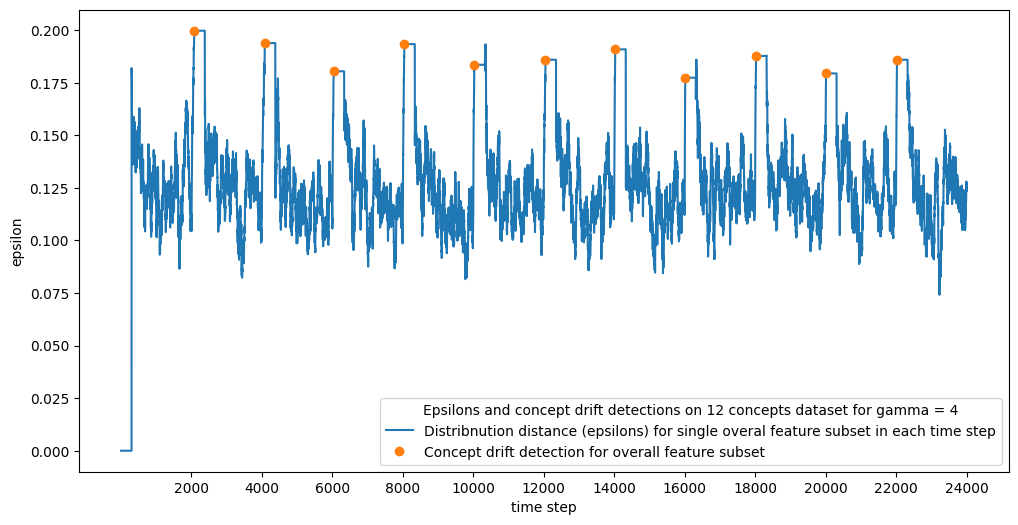

In [2]:
random.seed(42)
np.random.seed(42)
train_data, _ = pf.create_12_concept_dataset(24000, 12,[20,18,17,18,17.6,20.6,20.2,19.6,17.4,18,18.4,19])
hellinger_process = cl.Hellinger_detection([150,[[0,1,2,3,4,5]],4,1,[30,0,11]])
x_epsilons, y_epsilons, x_drift, y_drift = pf.process_dataset_return_data_for_graph(train_data,hellinger_process,1)
plt.figure(figsize=(12, 6))
plt.plot(x_epsilons[0], y_epsilons[0], label='Distribnution distance (epsilons) for single overal feature subset in each time step')
plt.plot(x_drift[0], y_drift[0],'o',label='Concept drift detection for overall feature subset')
plt.xticks([i*2000 for i in range(1,13)])
plt.xlabel('time step')
plt.ylabel('epsilon')
plt.legend(title = "Epsilons and concept drift detections on 12 concepts dataset for gamma = 4")
plt.show()

Figure A.5 -supplementary figure\
Hellinger detection on three subsets for gamma = 4

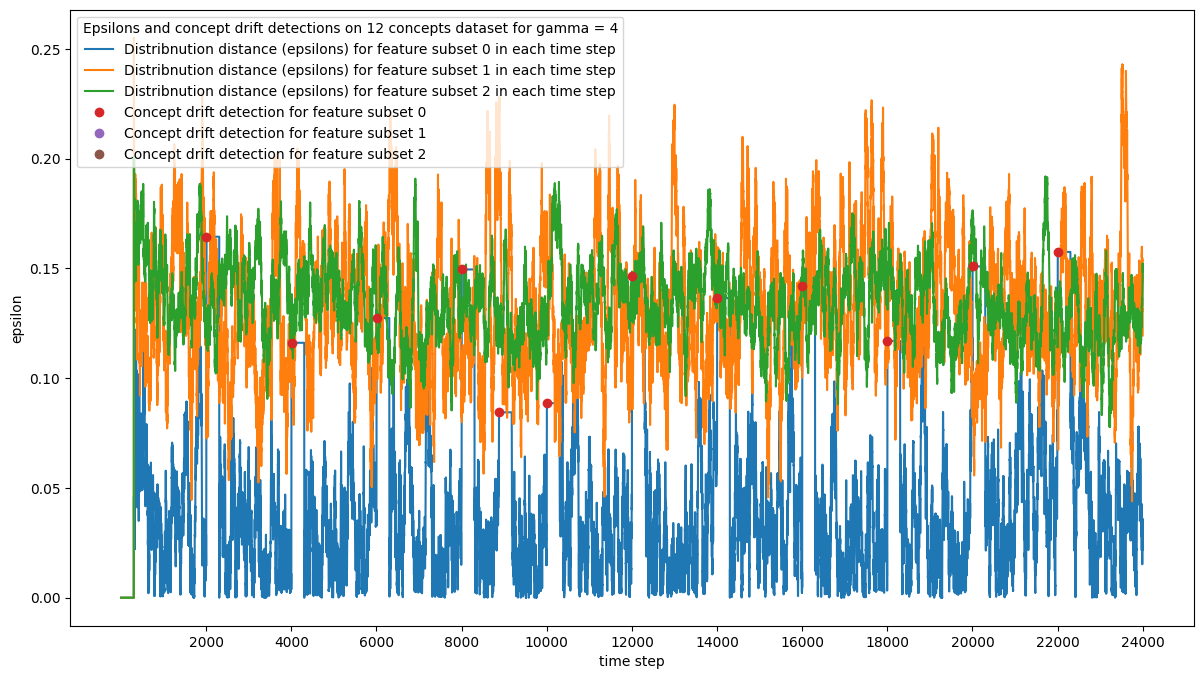

In [6]:
random.seed(42)
np.random.seed(42)
train_data, _ = pf.create_12_concept_dataset(24000, 12,[20,18,17,18,17.6,20.6,20.2,19.6,17.4,18,18.4,19])
hellinger_process = cl.Hellinger_detection([150,[[0],[1],[2,3,4,5]],4,1,[30,0,11]])
x_epsilons, y_epsilons, x_drift, y_drift = pf.process_dataset_return_data_for_graph(train_data,hellinger_process,3)

plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(x_epsilons[i], y_epsilons[i], label='Distribnution distance (epsilons) for feature subset '+str(i) +' in each time step')
for i in range(3):
    plt.plot(x_drift[i], y_drift[i],'o',label='Concept drift detection for feature subset '+str(i))
plt.xticks([i*2000 for i in range(1,13)])
plt.xlabel('time step')
plt.ylabel('epsilon')
plt.legend(title = "Epsilons and concept drift detections on 12 concepts dataset for gamma = 4")
plt.show()

Confidence intervals for Table 5.1\
Helinger detection confidence intervals, mean of 10 for concept drift detection with single overall feature subset and gamma = 4 

In [2]:
random.seed(42)
np.random.seed(42)
all_drifted = []
correct_detection_time_step_after_drift = []
for _ in range(10):
    train_data,train_target = pf.create_12_concept_dataset(24000, 12,[20,18,17,18,17.6,20.6,20.2,19.6,17.4,18,18.4,19])
    hellinger_process = cl.Hellinger_detection([150,[[0,1,2,3,4,5]],4,1,[30,0,11]])
    step = 0
    drifted_correct_false = [0,0] #count for correct and false detections 
    for data in train_data:
        step += 1
        drifted = hellinger_process.process_sample(data)
        if False in drifted:
            if step % 2000 < 150 : #consider correct drift if the alarm is set within one windom from drift, feature subset 1 does not drift
                drifted_correct_false[0] += 1
                correct_detection_time_step_after_drift.append(step % 2000)
            else:
                drifted_correct_false[1] += 1
    all_drifted.append(drifted_correct_false)
means_correct = [drifted[0] for drifted in all_drifted]
means_false = [drifted[1] for drifted in all_drifted]
print("Confidence interval for mean value of correct detection for single overall feature subset is ",stats.t.interval(confidence=0.95, df=len(means_correct)-1, loc=np.mean(means_correct),  scale=stats.sem(means_correct)))
print("List of numers of correct detections : ",means_correct)
print("Confidence interval for mean value of false detection for single overall feature subset is ",stats.t.interval(confidence=0.95, df=len(means_false)-1, loc=np.mean(means_false),  scale=stats.sem(means_false)))
print("Confidence interval for detection time after the correct drift detection for single overall feature subset is ",stats.t.interval(confidence=0.95, df=len(correct_detection_time_step_after_drift)-1, loc=np.mean(correct_detection_time_step_after_drift),  scale=stats.sem(correct_detection_time_step_after_drift)))

Confidence interval for mean value of correct detection for single overall feature subset is  (nan, nan)
List of numers of correct detections :  [11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
Confidence interval for mean value of false detection for single overall feature subset is  (-0.012139276066668314, 1.6121392760666684)
Confidence interval for detection time after the correct drift detection for single overall feature subset is  (38.70628342275565, 48.87553475906253)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Confidence intervals for Table 5.1\
Helinger detection confidence intervals, mean of 10 for concept drift detection with three feature subsets and gamma = 4

In [6]:
random.seed(42)
np.random.seed(42)

all_drifted = []
correct_detection_time_step_after_drift = [[],[],[]]
for _ in range(10):

    train_data,train_target = pf.create_12_concept_dataset(24000, 12,[20,18,17,18,17.6,20.6,20.2,19.6,17.4,18,18.4,19])
    hellinger_process = cl.Hellinger_detection([150,[[0],[1],[2,3,4,5]],4,1,[30,0,11]])
    step = 0
    drifted_correct_false = [[0,0] for _ in range(3)] #count for correct and false detections 
    for data in train_data:
        step += 1
        drifted = hellinger_process.process_sample(data)
        if False in drifted:
            for i in range(3):
                if drifted[i] == False:
                    if step % 2000 < 150 and i != 1: #consider correct drift if the alarm is set within one windom from drift, feature subset 1 does not drift
                        drifted_correct_false[i][0] += 1
                        correct_detection_time_step_after_drift[i].append(step % 2000)
                    else:
                        drifted_correct_false[i][1] += 1
    all_drifted.append(drifted_correct_false)
for i in range(3):
    means_correct = [drifted[i][0] for drifted in all_drifted]
    means_false = [drifted[i][1] for drifted in all_drifted]
    print("Confidence interval for mean value of correct detection for feature subset "+str(i)+" is ",stats.t.interval(confidence=0.95, df=len(means_correct)-1, loc=np.mean(means_correct),  scale=stats.sem(means_correct)))
    print("Confidence interval for mean value of false detection for feature subset "+str(i)+" is ",stats.t.interval(confidence=0.95, df=len(means_false)-1, loc=np.mean(means_false),  scale=stats.sem(means_false)))
    print("Confidence interval for mean value of time after the correct drift detection for for feature subset "+str(i)+" is ",stats.t.interval(confidence=0.95, df=len(correct_detection_time_step_after_drift[i])-1, loc=np.mean(correct_detection_time_step_after_drift[i]),  scale=stats.sem(correct_detection_time_step_after_drift[i])))

Confidence interval for mean value of correct detection for feature subset 0 is  (10.217170888079027, 11.182829111920972)
Confidence interval for mean value of false detection for feature subset 0 is  (1.5421867293008433, 3.0578132706991563)
Confidence interval for mean value of time after the correct drift detection for for feature subset 0 is  (3.84401436700694, 9.744770679722032)
Confidence interval for mean value of correct detection for feature subset 1 is  (nan, nan)
Confidence interval for mean value of false detection for feature subset 1 is  (-0.2911004288098087, 1.0911004288098087)
Confidence interval for mean value of time after the correct drift detection for for feature subset 1 is  (nan, nan)
Confidence interval for mean value of correct detection for feature subset 2 is  (nan, nan)
Confidence interval for mean value of false detection for feature subset 2 is  (-0.04555021440490431, 0.6455502144049043)
Confidence interval for mean value of time after the correct drift det

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountere

## Section 5.5


Figure 5.4 and confidence intervals for Table 5.2\
Evaluation of sub-procedures using DWM algorithm on 12 Concepts dataset, label delay l=50

In [ ]:
random.seed(42)  
np.random.seed(42)

pior_threshold_func = pf.create_prior_threshold([[3]*i for i in range(2,40)], own_hyperbola_params = [ 0.12222678, -1.17326296]) #parameters [ 0.12222678, -1.17326296] correspond to 3 flat dirichlet

delay = 50
mean_of = 10
accuracy_without_detect = []
overall_acc_GMM = []
overall_acc_Helling = []
overall_acc_usual = []
acc_100_GMM = []
acc_100_Helling = []
acc_100_usual = []
for _ in range(mean_of):
    train_data, train_target = pf.create_12_concept_dataset(24000,12,[20,18,17,18,17.6,20.6,20.2,19.6,17.4,18,18.4,19])
    train_data = np.array(train_data)
    train_target = np.array(train_target)
    process_usual = cl.DWM(train_data[:1],train_target[:1],50, 0.5, 2, 0.01, delay, 2)
    process_GMM = cl.DWM(train_data[:1],train_target[:1],50, 0.5, 2, 0.01, delay, 2,[2,[[[0],[1],[2,3,4,5]], 300, 0.05, [300,600],[35,41], pior_threshold_func, [1 * np.eye(1), 1 * np.eye(1), 1 * np.eye(4)]]])
    process_Helling = cl.DWM(train_data[:1],train_target[:1],50, 0.5, 2, 0.01, delay, 2,[1,[150,[[0],[1],[2,3,4,5]],4,75,[30,0,11]]])
    predictions_GMM = []
    predictions_Helling = []
    predictions_usual = []
    for data_index  in range(len(train_data)):
        if data_index < delay:  #we do not have labels for process yet
            predictions_usual.append(process_usual.process_sample(train_data[data_index : data_index + 1],[-1]))
            predictions_GMM.append(process_GMM.process_sample(train_data[data_index : data_index + 1],[-1]))
            predictions_Helling.append(process_Helling.process_sample(train_data[data_index : data_index + 1],[-1]))
        else:
            predictions_usual.append(process_usual.process_sample(train_data[data_index : data_index + 1],train_target[data_index - delay: data_index - delay + 1]))
            predictions_GMM.append(process_GMM.process_sample(train_data[data_index : data_index + 1],train_target[data_index - delay: data_index - delay +1]))
            predictions_Helling.append(process_Helling.process_sample(train_data[data_index : data_index + 1],train_target[data_index - delay: data_index - delay +1]))

    overall_acc_GMM.append((np.array([predictions_GMM]) == train_target).sum() / 24000)
    overall_acc_Helling.append((np.array([predictions_Helling]) == train_target).sum() / 24000)
    overall_acc_usual.append((np.array([predictions_usual]) == train_target).sum() / 24000)

    #get accuracies divided to intervals by 100
    x100,y100_usual = pf.list_of_correct(24000,100,predictions_usual,train_target)
    x100,y100_GMM = pf.list_of_correct(24000,100,predictions_GMM,train_target)
    x100,y100_Hellinger = pf.list_of_correct(24000,100,predictions_Helling,train_target)
    if acc_100_GMM == []:
        acc_100_GMM = y100_GMM
        acc_100_Helling = y100_Hellinger
        acc_100_usual = y100_usual
    else:
        acc_100_GMM = [acc_100_GMM[i] + y100_GMM[i] for i in range(len(acc_100_GMM))]
        acc_100_Helling = [acc_100_Helling[i] + y100_Hellinger[i] for i in range(len(acc_100_Helling))]
        acc_100_usual = [acc_100_usual[i] + y100_usual[i] for i in range(len(acc_100_usual))]

#normalize accuracies
acc_100_GMM = [acc / mean_of for acc in acc_100_GMM]
acc_100_Helling = [acc / mean_of for acc in acc_100_Helling]
acc_100_usual = [acc / mean_of for acc in acc_100_usual]

#plot results
x100 = [(1 + x) * 100 for x in x100]
plt.figure(figsize=(12, 5))
plt.plot(x100, acc_100_GMM, 'g-.',alpha=0.9, label='DWM with GMM detection, overall accuracy: '+str(np.sum(overall_acc_GMM) / mean_of))
plt.plot(x100, acc_100_Helling, 'b-.',alpha=0.9, label='DWM with Hellinger detection, overall accuracy: '+str(np.sum(overall_acc_Helling) / mean_of))
plt.plot(x100, acc_100_usual, 'r-.', alpha=0.6, label='DWM without detection, overall accuracy: '+str(np.sum(overall_acc_usual) / mean_of))
plt.xticks([i*2000 for i in range(1,13)])
plt.xlabel('time step')
plt.ylabel('accuracy in last 100 samples')
plt.legend(title = "Accuracy in 100 samples using drift indicators on 12 concepts dataset.")
plt.show() 
print(stats.t.interval(confidence=0.95, df=len(overall_acc_GMM)-1, loc=np.mean(overall_acc_GMM),  scale=stats.sem(overall_acc_GMM)))
print(stats.t.interval(confidence=0.95, df=len(overall_acc_Helling)-1, loc=np.mean(overall_acc_Helling),  scale=stats.sem(overall_acc_Helling)))
print(stats.t.interval(confidence=0.95, df=len(overall_acc_usual)-1, loc=np.mean(overall_acc_usual),  scale=stats.sem(overall_acc_usual)))

Figure 5.4 and confidence intervals for Table 5.2\
Evaluation of sub-procedures using DWM algorithm on 12 Concepts dataset, label delay l=1000

In [ ]:
random.seed(42)  
np.random.seed(42)

pior_threshold_func = pf.create_prior_threshold([[3]*i for i in range(2,40)], own_hyperbola_params = [ 0.12222678, -1.17326296])
delay = 1000
mean_of = 10
accuracy_without_detect = []
overall_acc_GMM = []
overall_acc_Helling = []
overall_acc_usual = []
acc_100_GMM = []
acc_100_Helling = []
acc_100_usual = []

for _ in range(mean_of):
    train_data, train_target = pf.create_12_concept_dataset(1200,24000,[20,18,17,18,17.6,20.6,20.2,19.6,17.4,18,18.4,19])
    train_data = np.array(train_data)
    train_target = np.array(train_target)
    process_usual = cl.DWM(train_data[:1],train_target[:1],50, 0.5, 2, 0.01, delay, 2)
    process_GMM = cl.DWM(train_data[:1],train_target[:1],50, 0.5, 2, 0.01, delay, 2,[2,[[[0],[1],[2,3,4,5]], 300, 0.05, [300,600],[35,41], pior_threshold_func, [1 * np.eye(1), 1 * np.eye(1), 1 * np.eye(4)]]])
    process_Helling = cl.DWM(train_data[:1],train_target[:1],50, 0.5, 2, 0.01, delay, 2,[1,[150,[[0],[1],[2,3,4,5]],4,400,[30,0,11]]])
    predictions_GMM = []
    predictions_Helling = []
    predictions_usual = []
    for data_index  in range(len(train_data)):
        if data_index < delay:  #we do not have labels for process yet
            predictions_usual.append(process_usual.process_sample(train_data[data_index : data_index + 1],[-1]))
            predictions_GMM.append(process_GMM.process_sample(train_data[data_index : data_index + 1],[-1]))
            predictions_Helling.append(process_Helling.process_sample(train_data[data_index : data_index + 1],[-1]))
        else:
            predictions_usual.append(process_usual.process_sample(train_data[data_index : data_index + 1],train_target[data_index - delay: data_index - delay + 1]))
            predictions_GMM.append(process_GMM.process_sample(train_data[data_index : data_index + 1],train_target[data_index - delay: data_index - delay +1]))
            predictions_Helling.append(process_Helling.process_sample(train_data[data_index : data_index + 1],train_target[data_index - delay: data_index - delay +1]))

    overall_acc_GMM.append((np.array([predictions_GMM]) == train_target).sum() / 24000)
    overall_acc_Helling.append((np.array([predictions_Helling]) == train_target).sum() / 24000)
    overall_acc_usual.append((np.array([predictions_usual]) == train_target).sum() / 24000)

    #get accuracies divided to intervals by 100
    x100,y100_usual = pf.list_of_correct(24000,100,predictions_usual,train_target)
    x100,y100_GMM = pf.list_of_correct(24000,100,predictions_GMM,train_target)
    x100,y100_Hellinger = pf.list_of_correct(24000,100,predictions_Helling,train_target)
    if acc_100_GMM == []:
        acc_100_GMM = y100_GMM
        acc_100_Helling = y100_Hellinger
        acc_100_usual = y100_usual
    else:
        acc_100_GMM = [acc_100_GMM[i] + y100_GMM[i] for i in range(len(acc_100_GMM))]
        acc_100_Helling = [acc_100_Helling[i] + y100_Hellinger[i] for i in range(len(acc_100_Helling))]
        acc_100_usual = [acc_100_usual[i] + y100_usual[i] for i in range(len(acc_100_usual))]

#normalize accuracies
acc_100_GMM = [acc / mean_of for acc in acc_100_GMM]
acc_100_Helling = [acc / mean_of for acc in acc_100_Helling]
acc_100_usual = [acc / mean_of for acc in acc_100_usual]

#plot results
x100 = [(1 + x) * 100 for x in x100]
plt.figure(figsize=(12, 5))
plt.plot(x100, acc_100_GMM, 'g-.',alpha=0.9, label='DWM with GMM detection, overall accuracy: '+str(np.sum(overall_acc_GMM) / mean_of))
plt.plot(x100, acc_100_Helling, 'b-.',alpha=0.9, label='DWM with Hellinger detection, overall accuracy: '+str(np.sum(overall_acc_Helling) / mean_of))
plt.plot(x100, acc_100_usual, 'r-.', alpha=0.6, label='DWM without detection, overall accuracy: '+str(np.sum(overall_acc_usual) / mean_of))
plt.xticks([i*2000 for i in range(1,13)])
plt.xlabel('time step')
plt.ylabel('accuracy in last 100 samples')
plt.legend(title = "Accuracy in 100 samples using drift indicators on 12 concepts dataset.")
plt.show()

print(stats.t.interval(confidence=0.95, df=len(overall_acc_GMM)-1, loc=np.mean(overall_acc_GMM),  scale=stats.sem(overall_acc_GMM)))
print(stats.t.interval(confidence=0.95, df=len(overall_acc_Helling)-1, loc=np.mean(overall_acc_Helling),  scale=stats.sem(overall_acc_Helling)))
print(stats.t.interval(confidence=0.95, df=len(overall_acc_usual)-1, loc=np.mean(overall_acc_usual),  scale=stats.sem(overall_acc_usual)))
 


## Section 5.6

Confidence intervals for Table 5.3 and Table 5.4, 

In [3]:
def confidence_interval(x,c):
    means_correct = [e[c] for e in x]
    interval = stats.t.interval(confidence=0.95, df=len(means_correct)-1, loc=np.mean(means_correct),  scale=stats.sem(means_correct))
    return round((interval[1]-interval[0])/2,3),round(interval[0]+(interval[1]-interval[0])/2,3)

def confidence_interval_difference(x,y):
    out=[]
    for i in range(10):
        c=[]
        for j in [1,3,4,2]:
            c.append(x[i][j]-y[i][j])
        out.append(c)
    for d in range(4):
        print(confidence_interval(out,d))

def confidence_intervals(x):
    for i in [1,3,4,2]:
        print(confidence_interval(x,i))

DWMd2_result = [(1824, 0.15482357540807348, 0.8663689188353836, 0.28134991119005326, 0.10679611650485436), (409, 0.18746897031079335, 0.8733301342084487, 0.34389799635701274, 0.12885612885612885), (4506, 0.15274463007159905, 0.8793542905692439, 0.2522393407380867, 0.109537887039054), (4012, 0.16245562747964085, 0.8754328483361543, 0.27598439162823696, 0.11510578487942004), (3657, 0.23179423613263092, 0.8851038190582128, 0.4125, 0.16118373796868266), (2286, 0.12711182622687045, 0.8653825276446595, 0.2256337022491967, 0.0884782304353913), (1679, 0.21743707531821227, 0.8729963966202783, 0.40746054519368724, 0.14828351390157943), (8935, 0.1519062748212867, 0.867758615351271, 0.28011717319663126, 0.10420923579893747), (1424, 0.15006956867421983, 0.8681955489797176, 0.274745269286754, 0.10322668854252119), (9674, 0.18450940234593186, 0.8640279394644936, 0.3566030946383591, 0.12445058395077233)]
DWMd6_result = [(1824, 0.22717933665981804, 0.8776373268891161, 0.4056603773584906, 0.15776600081532818), (409, 0.195484991317291, 0.8477750657153587, 0.42872687704026113, 0.12660668380462725), (4506, 0.23588596981553944, 0.8721952131637996, 0.4581976112920738, 0.1588257433195333), (4012, 0.2125061064973132, 0.8506854390515005, 0.4738562091503268, 0.1369647355163728), (3657, 0.2416775884665793, 0.8655856525577289, 0.4728205128205128, 0.16232394366197184), (2286, 0.1999450700357045, 0.8650701746259669, 0.3843717001055966, 0.13511507052709726), (1679, 0.24634760705289674, 0.8623735050597976, 0.49544072948328266, 0.16392893060677172), (8935, 0.20708446866485014, 0.8635724331926864, 0.4318181818181818, 0.13620071684587814), (1424, 0.2139008620689655, 0.8629274708756107, 0.43530701754385964, 0.1417857142857143), (9674, 0.2256926952141058, 0.8574740356083086, 0.47761194029850745, 0.14775725593667546)]
DWMdb2_result = [(1824, 0.312202362545612, 0.8351491973140036, 0.4539568345323741, 0.2379112074653596), (409, 0.307298495348692, 0.8354736342606323, 0.44262589928057555, 0.23534474514679163), (4506, 0.26449503207143754, 0.8267105224168074, 0.37823741007194245, 0.20334558112550763), (4012, 0.2876195269250126, 0.8314981251116005, 0.41115107913669063, 0.2211687306501548), (3657, 0.2708507491479648, 0.8319301574126227, 0.3787769784172662, 0.2107897107396657), (2286, 0.2825491660443117, 0.8286690941517426, 0.40827338129496404, 0.21602588503996956), (1679, 0.29431861318486646, 0.8340598360533793, 0.4183453237410072, 0.22701542065196173), (8935, 0.3034078417002565, 0.8306182152987125, 0.44676258992805756, 0.22970223783983726), (1424, 0.2865043582807334, 0.8246409786655635, 0.4285971223021583, 0.21516930022573363), (9674, 0.28264604810996563, 0.8260494323170097, 0.4142086330935252, 0.21451192250372578)]
DWMdb6_result = [(1824, 0.5502645502645503, 0.7855012617572837, 0.6172661870503597, 0.49638414810529363), (409, 0.5315802210212147, 0.7759817915284315, 0.5926258992805755, 0.48193652186631564), (4506, 0.49084366253498596, 0.7551248028921964, 0.551978417266187, 0.44190064794816414), (4012, 0.5391912908242613, 0.7739375906004425, 0.6235611510791367, 0.47493150684931507), (3657, 0.5215091187526103, 0.7372625463440737, 0.6737410071942446, 0.42539177833295483), (2286, 0.5006112967642025, 0.7660914713293121, 0.5523381294964029, 0.4577433298554181), (1679, 0.48151062155782853, 0.7495058537327048, 0.5503597122302158, 0.427972027972028), (8935, 0.5239911026374325, 0.7691566822051855, 0.5931654676258993, 0.4692657939669892), (1424, 0.5247689025835506, 0.7677785499189251, 0.5973021582733813, 0.4679442017753981), (9674, 0.4961649089165867, 0.7590278573885131, 0.5584532374100719, 0.4463772282921219)]

GMMd2_result = [(1824, 0.13758300132802126, 0.8494621994189281, 0.2760213143872114, 0.09162735849056604), (409, 0.1676979643081338, 0.8563334932895775, 0.3406193078324226, 0.11123007375684035), (4506, 0.13410077754215896, 0.8675368811307639, 0.23790756001433178, 0.09336332958380203), (4012, 0.1499103181346172, 0.8601686361589466, 0.28166016317843207, 0.10213532287110882), (3657, 0.19623334864492417, 0.8648343838833271, 0.3926470588235294, 0.13080220453153704), (2286, 0.11368345194126657, 0.8474076831216365, 0.2252766868975366, 0.07602409638554217), (1679, 0.19527670074021855, 0.85816351888668, 0.39741750358680056, 0.1294392523364486), (8935, 0.13382758292937932, 0.858918785026473, 0.2577810325887953, 0.09037227214377407), (1424, 0.15166211092496254, 0.8517199926021823, 0.3129548762736536, 0.10008146165483534), (9674, 0.17716738197424894, 0.8512068296468762, 0.37135660309463836, 0.11633412242137302)]
GMMd6_result = [(1824, 0.20468965517241378, 0.8660191467608513, 0.3888888888888889, 0.1388992886559341), (409, 0.18238852789603405, 0.8287176117161097, 0.4428726877040261, 0.11484198645598194), (4506, 0.23076923076923078, 0.856020942408377, 0.501628664495114, 0.14985403827440805), (4012, 0.22619579794367456, 0.8396628380881808, 0.55119825708061, 0.1422947131608549), (3657, 0.23582019298658508, 0.8491381313013985, 0.5138461538461538, 0.15302382406841783), (2286, 0.18054809242342826, 0.858724350363611, 0.35480464625131997, 0.12108108108108108), (1679, 0.2530630429939853, 0.8457681692732291, 0.5754812563323202, 0.16219303255282697), (8935, 0.20428422152560086, 0.8571964369432724, 0.44431818181818183, 0.13263229308005428), (1424, 0.1955951756685894, 0.855881247651259, 0.40899122807017546, 0.12853204686423156), (9674, 0.2303448275862069, 0.8447700296735905, 0.5341151385927505, 0.14683470105509966)]
GMMdb2_result = [(1824, 0.2908498567657137, 0.8128548346452024, 0.4656474820143885, 0.21146777750551335), (409, 0.27629030420417, 0.8116139747315974, 0.43615107913669066, 0.20218442554610638), (4506, 0.25204187277119516, 0.8073310220167719, 0.39406474820143883, 0.1852697446304752), (4012, 0.27401847575057736, 0.8128980417832272, 0.4267985611510791, 0.2017857142857143), (3657, 0.2704032027452101, 0.8109121631636677, 0.4251798561151079, 0.1982389937106918), (2286, 0.2823299407739635, 0.8145054618414208, 0.44154676258992803, 0.20750570535035076), (1679, 0.2917303846606282, 0.8208488923932934, 0.4460431654676259, 0.21674532424401327), (8935, 0.27454545454545454, 0.8103921947162862, 0.43453237410071943, 0.20066445182724252), (1424, 0.29143017701601576, 0.8137078186868388, 0.46636690647482015, 0.21193297915815285), (9674, 0.26896323285856244, 0.8029552252131601, 0.4381294964028777, 0.1940417396845627)]
GMMdb6_result = [(1824, 0.5640759418570156, 0.7752542632102164, 0.6839928057553957, 0.4799343765774861), (409, 0.5044766903365235, 0.7523339248514775, 0.5877697841726619, 0.4418604651162791), (4506, 0.513420302893987, 0.7503942156070921, 0.6158273381294964, 0.44021599382874776), (4012, 0.56957462148522, 0.7722590981918059, 0.710431654676259, 0.4753309265944645), (3657, 0.5231761386537687, 0.7287008370599702, 0.7003597122302159, 0.41754235470727), (2286, 0.49807888339998435, 0.7556310605482172, 0.5712230215827339, 0.4415403864868622), (1679, 0.504682700232262, 0.7487076174547667, 0.6057553956834533, 0.432515731347117), (8935, 0.5092793071450665, 0.7555187425357321, 0.5922661870503597, 0.44669017905588715), (1424, 0.5504490227152667, 0.7700177592463903, 0.6559352517985612, 0.4741906124041087), (9674, 0.4918032786885246, 0.7441247277312851, 0.5827338129496403, 0.4254201680672269)]

Hellingerd2_result = [(1824, 0.1287690317444522, 0.8646998825492984, 0.22984014209591475, 0.08943876140447884), (409, 0.20642474717430104, 0.8761009891487748, 0.37923497267759565, 0.14180629342051493), (4506, 0.15377960419595543, 0.8791225766586854, 0.2547474023647438, 0.11013011152416356), (4012, 0.18289689034369888, 0.8759608068448268, 0.31713373536715145, 0.12850366537300562), (3657, 0.21804826862539348, 0.8848720800889878, 0.38198529411764703, 0.15256975036710718), (2286, 0.1368559570806762, 0.8677553932288031, 0.24134237772224207, 0.09550720542526138), (1679, 0.22517310063549273, 0.8731206510934394, 0.4257532281205165, 0.15306254029658284), (8935, 0.16532057034599662, 0.8704059200544942, 0.3035518125228854, 0.11359276514113456), (1424, 0.1656514049911574, 0.869120276185192, 0.3067685589519651, 0.11345895020188425), (9674, 0.19513071601832718, 0.8609390764454793, 0.3907880532565671, 0.1300287356321839)]
Hellingerd6_result = [(1824, 0.23553719008264468, 0.8796356538711776, 0.41823899371069184, 0.1639276910435497), (409, 0.19332679097154074, 0.8456627863312054, 0.42872687704026113, 0.12480202724105163), (4506, 0.2447280799112098, 0.8727561705310396, 0.4788273615635179, 0.16436824450242266), (4012, 0.22058074375955172, 0.8582808447573175, 0.47167755991285404, 0.1439494680851064), (3657, 0.2469798657718121, 0.8696743019095851, 0.4717948717948718, 0.16727272727272727), (2286, 0.20149253731343286, 0.8711380795775626, 0.3706441393875396, 0.1383523847063461), (1679, 0.2477383437717467, 0.8508279668813248, 0.541033434650456, 0.16064981949458484), (8935, 0.22504047490555856, 0.8653539615564932, 0.4738636363636364, 0.1475583864118896), (1424, 0.2162312395775431, 0.8675310033821871, 0.42653508771929827, 0.14482501861504096), (9674, 0.23235887096774194, 0.8587722551928784, 0.4914712153518124, 0.15214521452145213)]
Hellingerdb2_result = [(1824, 0.32003380213677796, 0.8330146306755014, 0.47679856115107916, 0.24084673389661124), (409, 0.3217657878602085, 0.8359629871285367, 0.4719424460431655, 0.24409302325581395), (4506, 0.2718288716537403, 0.8275105935342401, 0.3908273381294964, 0.20838128116609128), (4012, 0.2971759059865871, 0.8300249985119933, 0.43435251798561153, 0.22584868605629851), (3657, 0.28446194892643883, 0.8330418284765659, 0.4026978417266187, 0.21989785896680417), (2286, 0.28451728174480934, 0.8274058111020287, 0.41528776978417264, 0.21638084528160434), (1679, 0.32806273299910016, 0.8444738682178615, 0.4589928057553957, 0.255251050210042), (8935, 0.3038780165686157, 0.8277966705772286, 0.4552158273381295, 0.2280591097495044), (1424, 0.28612578012481993, 0.8242420660717452, 0.4287769784172662, 0.21469740634005763), (9674, 0.32097425694821247, 0.8324033153281848, 0.4787769784172662, 0.24140745443003536)]
Hellingerdb6_result = [(1824, 0.54973485457175, 0.7857306721725167, 0.6152877697841727, 0.4968051118210863), (409, 0.5340322580645162, 0.7771005323663298, 0.5955035971223022, 0.48406432748538014), (4506, 0.4936719064893188, 0.7584323679858467, 0.5507194244604317, 0.4473338203067933), (4012, 0.5382819794584501, 0.7736324101625086, 0.6221223021582734, 0.47435545803620405), (3657, 0.5213032581453634, 0.7371861025111799, 0.6733812949640288, 0.42526124488868694), (2286, 0.5018726591760299, 0.7664350614644575, 0.5543165467625899, 0.4584944956858078), (1679, 0.48162430156606595, 0.7496198874866961, 0.5503597122302158, 0.4281516720302225), (8935, 0.5101533028332933, 0.7648803790884925, 0.5715827338129497, 0.4606464705029715), (1424, 0.5262824070403552, 0.7693228322137287, 0.5969424460431655, 0.4705798950801078), (9674, 0.5267625560009431, 0.7699186059841797, 0.6026978417266187, 0.4678207454976965)]

#Please add difference you are interested in
print("Confidence intervals of difference:")
confidence_interval_difference(Hellingerdb2_result,DWMdb2_result)

#Please add evaluation you are interested in
print("Confidence intervals of difference - GMM sub-procedure")
confidence_intervals(GMMdb6_result)

Confidence intervals of difference:
(0.01, 0.013)
(0.013, 0.023)
(0.008, 0.008)
(0.003, 0.001)
Confidence intervals of difference - GMM sub-procedure
(0.02, 0.523)
(0.037, 0.631)
(0.016, 0.448)
(0.01, 0.755)
